# Extract data from IRIS network

### Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# fdsn client for connecting with web services, data pull
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

from datetime import datetime, timedelta

import math # rounding

import warnings
warnings.filterwarnings("ignore")

### Define Lat/Lon Box

In [ ]:
# useful lat/lon coords:

# Box around all of California:
#longitude_xmax = -109.83
#longitude_xmin = -127.672
#latitude_ymax = 42.461
#latitude_ymin = 28.938

# Ventura County 
#ventura_xmax = -118.632494
#ventura_xmin = -119.636302
#ventura_ymax = 34.901171
#ventura_ymin = 33.163493

# Palmdale, CA box covering near San Andreas Fault
#palm_xmax = -117.427
#palm_xmin = -118.769
#palm_ymax = 34.843
#palm_y_min = 34.312

# Get lat/lon for specific county in USA
#df_lat = pd.read_csv('./data_in/usa_county_bounding_boxes_v1.csv')
#df_sel1 = df_lat[df_lat['COUNTY_NAME'] == 'Ventura']
#df_sel1

# Draw box on map and get lat/lon out
# https://earthquake.usgs.gov/earthquakes/search/

# Enter a lat/lon box and viz on map
#https://dwtkns.com/pointplotter/
#https://earthquake.usgs.gov/earthquakes/search/

In [ ]:
# All California lat/lon box:

longitude_xmax = -109.83 # -114.52  #-118.632494
longitude_xmin = -127.672 # -121.75 # -119.636302

latitude_ymax = 42.461 # 37.42 # 34.901171
latitude_ymin = 28.938 # 32.55 #33.163493

# Useful notes:

#  longitude are verical lines on globe, parallel to prime meridian (longitude is x-axis tick marks!)
#  latitude are horiontal lines on globe, parallel to equator (latitude is y-axis tick marks!)

# Example:  latitude of California, USA is 36.778259, and the longitude is -119.417931
# Example:  Latitude of Pasadena, CA, USA is 34.156113, and the longitude is -118.131943. 

# https://www.yourdictionary.com/articles/latitude-vs-longitude

# Longitude is the points east and west of the prime meridian. 
# Longitude is x-axis tick marks!

# Latitude is the points north and south of the equator.
# latitude is y-axis tick marks!

### Round Lat/Long Box Larger to Catch All Points

In [ ]:
longitude_xmax_ceil = math.ceil(longitude_xmax)
longitude_xmin_floor = math.floor(longitude_xmin)

latitude_ymax_ceil = math.ceil(latitude_ymax)
latitude_ymin_floor = math.floor(latitude_ymin)

print(longitude_xmax, longitude_xmax_ceil)
print(longitude_xmin, longitude_xmin_floor)
print(" ")
print(latitude_ymax, latitude_ymax_ceil)
print(latitude_ymin, latitude_ymin_floor)

### Connect to IRIS data

In [ ]:
iris_client = Client("IRIS", timeout=90000) #600 is reasonable timeout

### Fetch IRIS data

In [ ]:
cat_ventura = []
cat_ventura = iris_client.get_events(
                           minlat= ventura_minlat,#33,# 32,
                           maxlat= ventura_maxlat,#35 ,#36, #35,
                           minlon= ventura_minlon, #-120, #-121, #-119,
                           maxlon= ventura_maxlon, #-118, #-117,
                           #starttime=UTCDateTime("2023-08-17"),
                           starttime=UTCDateTime("1900-01-01"),
                           #starttime=UTCDateTime("2023-08-19"),
                           #endtime=UTCDateTime("2023-08-21"),
                           #endtime=UTCDateTime("2023-08-23"),
                           endtime=UTCDateTime("2023-09-05"),
                           #starttime=UTCDateTime("2019-01-01"),
                           #endtime=UTCDateTime("2023-02-28"),
                           minmag=0.0) # 2.0

### Extract IRIS data

In [ ]:
times = []
lats = []
lons = []
deps = []
magnitudes = []
magnitudestype = []
for event in cat:
    if len(event.origins) != 0 and len(event.magnitudes) != 0:
        times.append(event.origins[0].time.datetime)
        lats.append(event.origins[0].latitude)
        lons.append(event.origins[0].longitude)
        deps.append(event.origins[0].depth)
        magnitudes.append(event.magnitudes[0].mag)
        magnitudestype.append(event.magnitudes[0].magnitude_type )

### Convert IRIS data to Pandas dataframe

In [ ]:
df = pd.DataFrame({'datetime':times, 'lat':lats,'lon':lons,'depth':deps,
                   'mag':magnitudes,'type':magnitudestype})

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')
df = df.reset_index(drop=True)

print(df.shape)
print(df.columns)
display(df.head(4))
display(df.tail(4))

### Save IRIS dataframe to csv

In [ ]:
# df.to_csv('data_obspy_iris_AllCalBox_1960_to_2023sept04_20230904.csv', index=False)

### Ingest previously saved seismic csv

In [2]:
df = pd.read_csv('../data_seismic_ca_IrisAll_1960to1923/data_obspy_iris_AllCalBox_1960_to_2023sept04_20230904.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')
df = df.reset_index(drop=True)

print(df.shape)
print(df.columns)
display(df.head(4))
display(df.tail(4))

(556585, 6)
Index(['datetime', 'lat', 'lon', 'depth', 'mag', 'type'], dtype='object')


,datetime,lat,lon,depth,mag,type
0,1960-01-20 03:25:49,36.56,-121.71,0.0,5.0,NaN
1,1960-02-27 19:22:25,37.93,-122.02,NaN,3.4,NaN
2,1960-03-16 08:21:38,34.37,-118.93,NaN,3.2,NaN
3,1960-03-22 18:31:33,37.73,-122.13,NaN,2.6,NaN


,datetime,lat,lon,depth,mag,type
556581,2023-09-04 15:53:58.330,33.487333,-116.592167,8920.0,1.45,Ml
556582,2023-09-04 16:03:29.900,38.768501,-122.736336,1240.0,0.94,Md
556583,2023-09-04 16:03:48.020,33.337500,-116.333000,9400.0,0.63,Ml
556584,2023-09-04 16:13:51.170,36.859165,-121.613670,3390.0,0.69,Md


### Quick viz of lat/lon

https://www.yourdictionary.com/articles/latitude-vs-longitude

Longitude is the points east and west of the prime meridian.    
Longitude is x-axis tick marks!    
      
Latitude is the points north and south of the equator.    
Latitude is y-axis tick marks!    

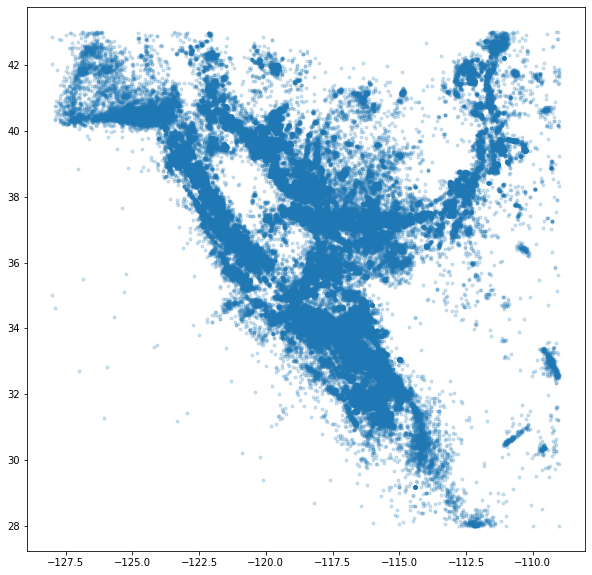

In [3]:
plt.figure(figsize=(10,10))
plt.plot(df['lon'], df['lat'], '.', alpha=0.2);

In [4]:
df.head(3)

,datetime,lat,lon,depth,mag,type
0,1960-01-20 03:25:49,36.56,-121.71,0.0,5.0,NaN
1,1960-02-27 19:22:25,37.93,-122.02,NaN,3.4,NaN
2,1960-03-16 08:21:38,34.37,-118.93,NaN,3.2,NaN


In [5]:
df['mag'].value_counts()

1.10    9317
0.80    9105
0.90    9004
1.00    8209
0.70    7860
        ... 
5.24       1
4.74       1
4.37       1
5.44       1
0.83       1
Name: mag, Length: 540, dtype: int64

In [6]:
i = 3

print(df['mag'][i])
round(df['mag'][i])

2.6


3

In [7]:
df['mag_rnd'] = round(df['mag'])

In [8]:
df.head(3)

,datetime,lat,lon,depth,mag,type,mag_rnd
0,1960-01-20 03:25:49,36.56,-121.71,0.0,5.0,NaN,5.0
1,1960-02-27 19:22:25,37.93,-122.02,NaN,3.4,NaN,3.0
2,1960-03-16 08:21:38,34.37,-118.93,NaN,3.2,NaN,3.0


In [9]:
df['mag_rnd'].value_counts()

1.0    293617
2.0    116310
0.0     85112
3.0     46772
4.0     12999
5.0      1494
6.0       263
7.0        18
Name: mag_rnd, dtype: int64

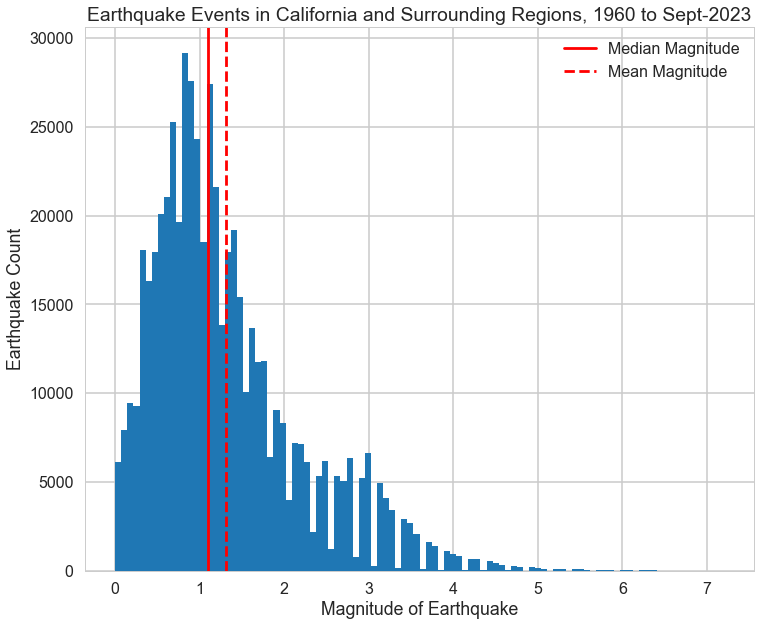

In [10]:
# plt.figure(figsize=(7,5))
plt.figure(figsize=(12,10))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.hist(df['mag'], bins=100);

plt.xlabel('Magnitude of Earthquake')
# plt.ylabel('Count of Earthquake Events in CA')
plt.ylabel('Earthquake Count')

plt.title('Earthquake Events in California and Surrounding Regions, 1960 to Sept-2023')

plt.axvline(x=np.median(df['mag']), color='r', label='Median Magnitude')

plt.axvline(x=np.mean(df['mag']), color='r', linestyle='--', label='Mean Magnitude')

plt.legend();

In [11]:
print(np.median(df['mag']))
print(np.mean(df['mag']))
print(np.std(df['mag']))

print(np.max(df['mag']))

1.1
1.3064233171932413
0.8781711545027892
7.2


In [12]:
df_m3 = df[df['mag'] >= 3.0]
df_m3 = df_m3.reset_index(drop=True)

print(df.shape, df_m3.shape)

(556585, 7) (37013, 7)


In [13]:
# df_m3.to_csv('data_m3_obspy_iris_AllCalBox_1960_to_2023sept04_20230904.csv', index=False)

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
img1 = Image.open('./img_in/ca_seis_map1.png')
img2 = Image.open('./img_in/ca_seis_map2.png')

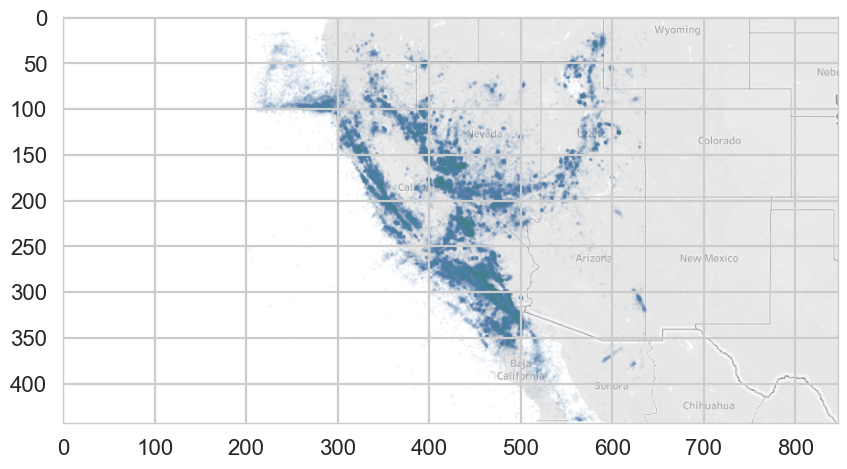

In [16]:
plt.figure(figsize=(10,10))
#plt.imshow('./img_in/ca_seis_map1.png')
#! []("./img_in/ca_seis_map1.png")

plt.imshow(img1)

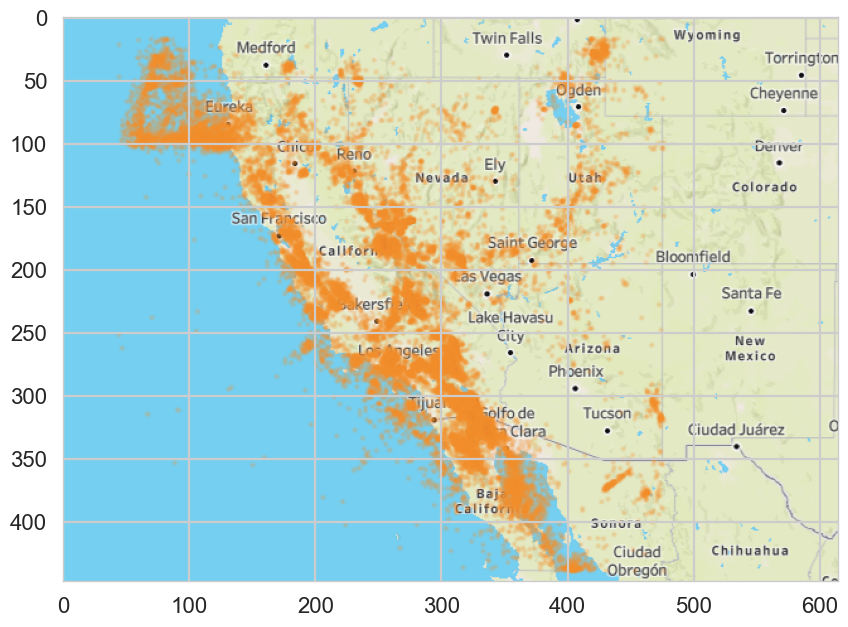

In [17]:
plt.figure(figsize=(10,10))

plt.imshow(img2)

### California Earthquake Depth Characterization

nan
6333.339330272985


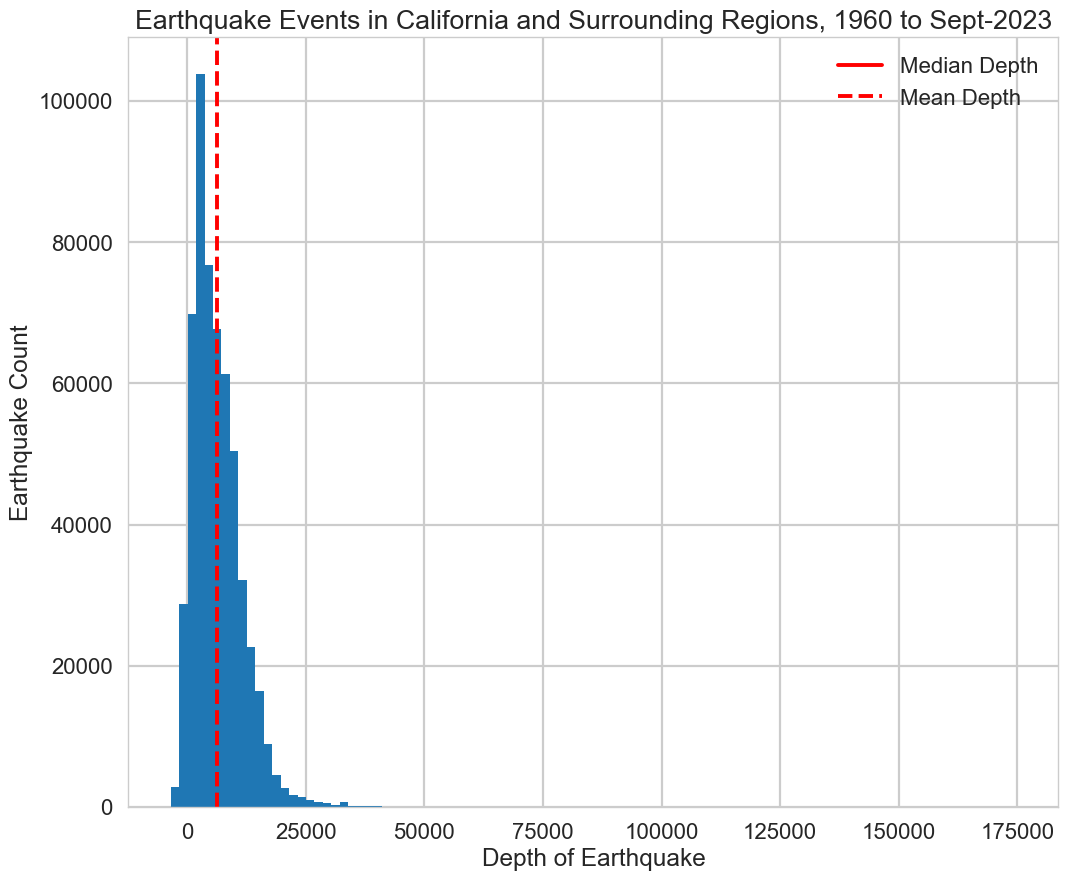

In [18]:
# plt.figure(figsize=(7,5))
plt.figure(figsize=(12,10))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.hist(df['depth'], bins=100);

plt.xlabel('Depth of Earthquake')
# plt.ylabel('Count of Earthquake Events in CA')
plt.ylabel('Earthquake Count')

plt.title('Earthquake Events in California and Surrounding Regions, 1960 to Sept-2023')

plt.axvline(x=np.median(df['depth']), color='r', label='Median Depth')
plt.axvline(x=np.mean(df['depth']), color='r', linestyle='--', label='Mean Depth')

print(np.median(df['depth']))
print(np.mean(df['depth']))

plt.legend();

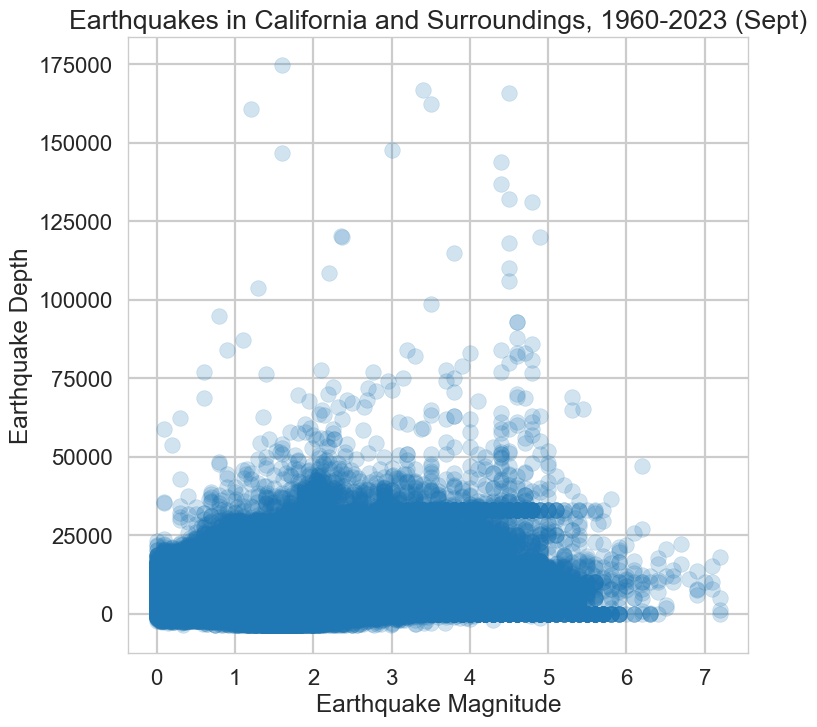

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(df['mag'], df['depth'], alpha=0.2);

plt.xlabel('Earthquake Magnitude')
plt.ylabel('Earthquake Depth');

plt.title('Earthquakes in California and Surroundings, 1960-2023 (Sept)');

### Create aggregated time sereis

In [20]:
df.tail(3)

,datetime,lat,lon,depth,mag,type,mag_rnd
556582,2023-09-04 16:03:29.900,38.768501,-122.736336,1240.0,0.94,Md,1.0
556583,2023-09-04 16:03:48.020,33.337500,-116.333000,9400.0,0.63,Ml,1.0
556584,2023-09-04 16:13:51.170,36.859165,-121.613670,3390.0,0.69,Md,1.0


In [25]:
df_aggr1 = []
df_aggr1 = df[['datetime', 'mag', 'depth']]

df_aggr1.head(2)

,datetime,mag,depth
0,1960-01-20 03:25:49,5.0,0.0
1,1960-02-27 19:22:25,3.4,NaN


In [26]:
df_aggr1.index = df_aggr1['datetime']

In [27]:

df_aggr1 = df_aggr1[['mag', 'depth']]

# df_aggr1

df_m_avg = df_aggr1.resample('M').mean()
df_m_median = df_aggr1.resample('M').median()
df_m_std = df_aggr1.resample('M').std()

df_m_max = df_aggr1.resample('M').max()

In [28]:
df_Y_max = df_aggr1.resample('Y').max()

In [30]:
# df_Y_max

In [ ]:
df_m_avg
df_m_median
df_m_std
df_m_max

In [31]:
df_m_max['mag']

datetime
1960-01-31    5.00
1960-02-29    3.40
1960-03-31    4.00
1960-04-30    4.20
1960-05-31    4.10
              ... 
2023-05-31    5.60
2023-06-30    4.45
2023-07-31    4.50
2023-08-31    5.08
2023-09-30    2.80
Freq: M, Name: mag, Length: 765, dtype: float64

In [32]:
df_m_max = df_m_max.reset_index()
df_m_median = df_m_median.reset_index()
df_m_avg = df_m_avg.reset_index()
df_m_std = df_m_std.reset_index()

In [37]:
df_Y_max = df_Y_max.reset_index()

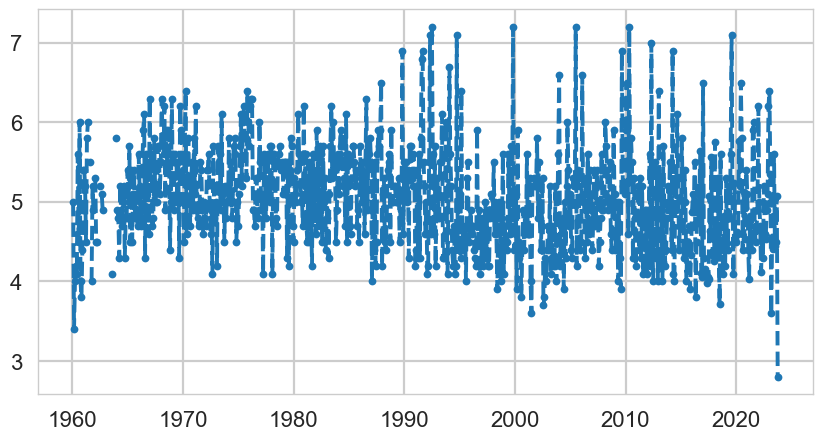

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df_m_max['datetime'], df_m_max['mag'], '.--')

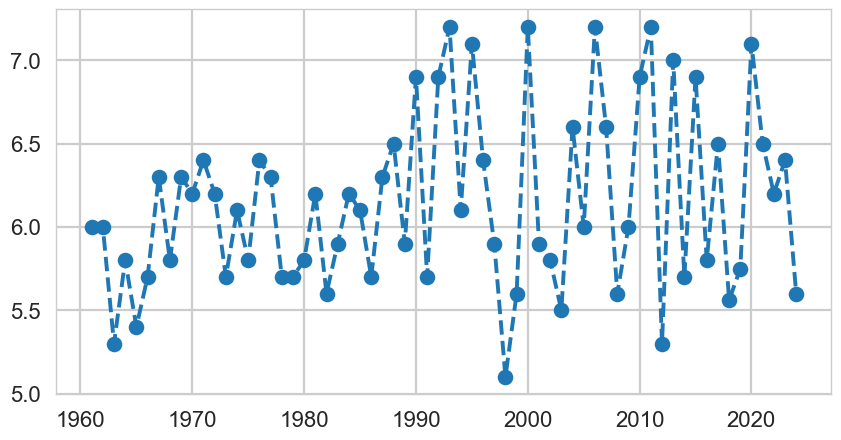

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df_Y_max['datetime'], df_Y_max['mag'], 'o--')

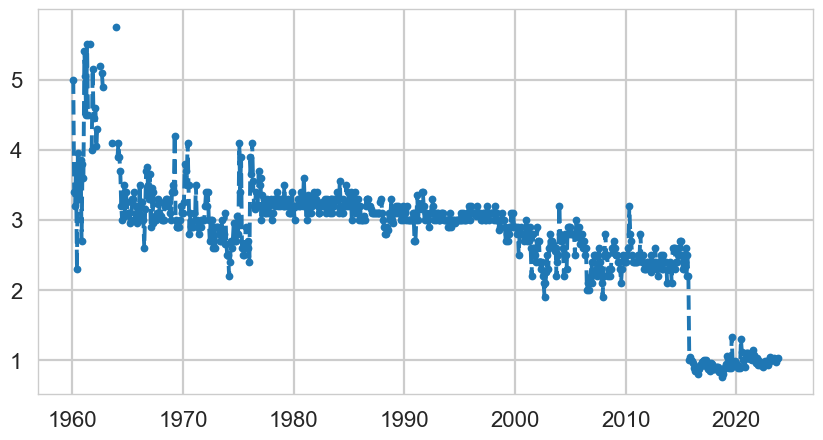

In [34]:
plt.figure(figsize=(10,5))
plt.plot(df_m_median['datetime'], df_m_median['mag'], '.--')

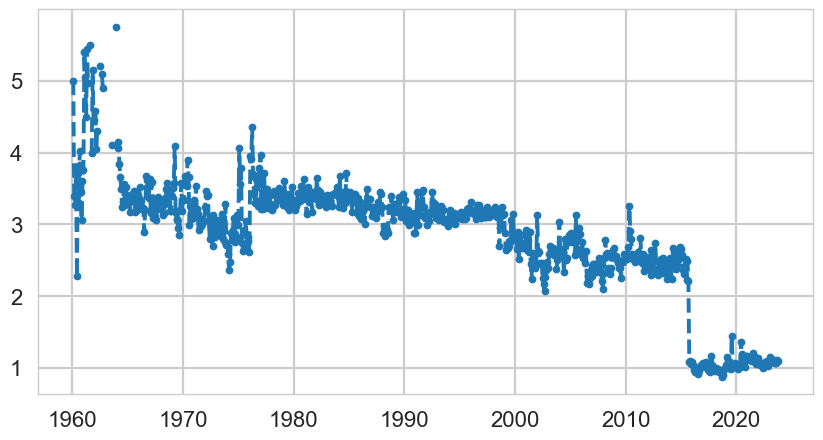

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df_m_avg['datetime'], df_m_avg['mag'], '.--')

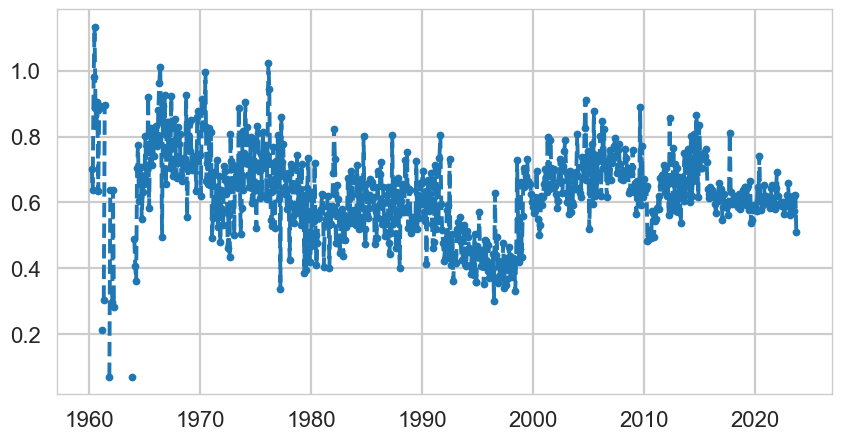

In [40]:
plt.figure(figsize=(10,5))
plt.plot(df_m_std['datetime'], df_m_std['mag'], '.--')

### Next steps:

* Draw targeted lat/lon box (example, over this area).
* Get characteristics metrics, month by month (max, avg, std, median, other quantiles, count), and then score, anomalous month or not, and why. 
* Example of keeping things simple: Cekim, Hatice Oncel, Senem Tekin, and Gamze Özel. "**Prediction of the earthquake magnitude by time series methods along the East Anatolian Fault**, Turkey." Earth Science Informatics 14, no. 3 (2021): 1339-1348.